In [2]:
# drugi dio Zavrsnog testa, ML zadatak

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,Iris-setosa
1,2.0,4.9,3.0,1.4,0.2,Iris-setosa
2,3.0,4.7,3.2,1.3,0.2,Iris-setosa
3,4.0,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146.0,6.7,3.0,5.2,2.3,Iris-virginica
146,147.0,6.3,2.5,5.0,1.9,Iris-virginica
147,148.0,6.5,3.0,5.2,2.0,Iris-virginica
148,149.0,6.2,3.4,5.4,2.3,Iris-virginica
149,150.0,NaN,3.0,5.1,1.8,Iris-virginica


In [31]:
df = df.fillna(0)

In [32]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
144,145.0,6.7,3.3,5.7,2.5,Iris-virginica
145,146.0,6.7,3.0,5.2,2.3,Iris-virginica
146,147.0,6.3,2.5,5.0,1.9,Iris-virginica
147,148.0,6.5,3.0,5.2,2.0,Iris-virginica
148,149.0,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
X = df.iloc[:, 1:5] #definiramo features kolone
y = df.iloc[:, 5]   # defiviramo value kolonu

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [37]:
from sklearn.preprocessing import StandardScaler #Normalizacija podataka
from sklearn.model_selection import cross_val_score

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from sklearn.neighbors import KNeighborsClassifier #fitanje podataka

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
y_pred = classifier.predict(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6  0  0]
 [ 0 14  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        29
      macro avg       1.00      1.00      1.00        29
   weighted avg       1.00      1.00      1.00        29



U ovom slucaju, ono sto citamo iz confusion_matrix je da odabrani model nije imao misklasifikacije, odnosno svi podaci su
ispravno klasifikovani, odnosno accuracy za klasifikaciju ucitanog data seta je 1.0.
ovo je prilično neobično, ali se potencijalno može dogoditi u brojnim scenarijima, npr. ako je klasifikator overfitting, ili ako
su podaci o testiranju previše slični podacima o treningu itd.
Zakljucak je da model ima ogroman flexibility prema datim podacima.

Pokusacu jos jednom za classifier = 7

In [46]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [47]:
y_pred = classifier.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6  0  0]
 [ 0 14  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        29
      macro avg       1.00      1.00      1.00        29
   weighted avg       1.00      1.00      1.00        29



i za classifier = 7 dobijam istu accuracy, mozda u bi trebalo ponovo ucitati random training i test set.
Moguce rjesenje bi bilo random izmijesati data set i izabrati train i test podatke u nekom drugom omjeru, npr: 70:30


In [54]:
error=[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

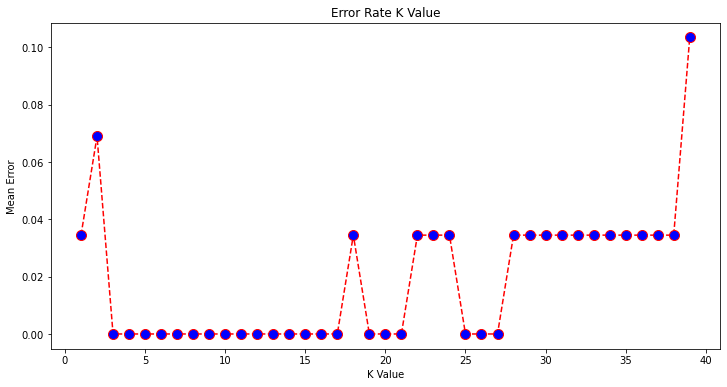

In [55]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title("Error Rate K Value")
plt.xlabel('K Value')
plt.ylabel('Mean Error')


najmanji mean error nalazi se u rasponu od 3 do 17 K Value


- Moguce rjesenje bi bilo random izmijesati data set i izabrati train i test podatke u nekom drugom omjeru, npr: 70:30

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [59]:
from sklearn.neighbors import KNeighborsClassifier #fitanje podataka

classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [60]:
y_pred = classifier.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  0  0]
 [ 0 14  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.98        44
      macro avg       0.97      0.98      0.97        44
   weighted avg       0.98      0.98      0.98        44



- u slucaju drugacije distribucije test i training set-a, dobili smo nesto manji accuracy=0,98, u nasem primjeru za
classifier = 7, od 10 pokusaja, za Iris-virginica smo u 9 slucajeva tacno predictali, a jednom smo pogresno prediktali. 